 # <center>  LAB3 - Interpolacja </center>
# <center>  Gosztyła Mikołaj, Smółka Antoni </center> 


## Zadanie 1. 


Populacja Stanów Zjednoczonych na przestrzeni lat przedstawiała się następująco:

| Rok  | Populacja   |
|------|-------------|
| 1900 | 76 212 168  |
| 1910 | 92 228 496  |
| 1920 | 106 021 537 |
| 1930 | 123 202 624 |
| 1940 | 132 164 569 |
| 1950 | 151 325 798 |
| 1960 | 179 323 175 |
| 1970 | 203 302 031 |
| 1980 | 226 542 199 |

Istnieje dokładnie jeden wielomian ósmego stopnia, który interpoluje powyższe dziewięć punktów, natomiast sam wielomian może być reprezentowany na różne sposoby. Rozważamy następujące zbiory funkcji bazowych φ<sub>j</sub>(t), j = 1 ... 9:

1. φ<sub>j</sub>(t) = t<sup>j-1</sup>
2. φ<sub>j</sub>(t) = (t − 1900)<sup>j-1</sup>
3. φ<sub>j</sub>(t) = (t − 1940)<sup>j-1</sup>
4. φ<sub>j</sub>(t) = ((t − 1940)/40)<sup>j-1</sup>

(a) Dla każdego z czterech zbiorów funkcji bazowych utwórz macierz Vandermonde’a.

(b) Oblicz współczynnik uwarunkowania każdej z powyższych macierzy używając funkcji `numpy.linalg.cond`.

(c) Używając najlepiej uwarunkowanej bazy wielomianów, znajdź współczynniki wielomianu interpolacyjnego dla danych z zadania. Narysuj wielomian interpolacyjny. W tym celu użyj schematu Hornera i oblicz na przedziale [1900,1990] wartości wielomianu w odstępach jednorocznych. Na wykresie umieść także węzły interpolacji.

(d) Dokonaj ekstrapolacji wielomianu do roku 1990. Porównaj otrzymaną wartość z prawdziwą wartością dla roku 1990 wynoszącą 248 709 873. Ile wynosi błąd względny ekstrapolacji dla roku 1990?

(e) Wyznacz wielomian interpolacyjny Lagrange’a na podstawie 9 węzłów interpolacji podanych w zadaniu. Oblicz wartości wielomianu w odstępach jednorocznych.

(f) Wyznacz wielomian interpolacyjny Newtona na podstawie tych samych węzłów interpolacji i oblicz wartości wielomianu w odstępach jednorocznych.

(g) Zaokrąglij dane podane w tabeli do jednego miliona. Na podstawie takich danych wyznacz wielomian interpolacyjny ósmego stopnia używając najlepiej uwarunkowanej bazy z podpunktu (c). Porównaj wyznaczone współczynniki z współczynnikami obliczonymi w podpunkcie (c). Wyjaśnij otrzymany wynik.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange, KroghInterpolator


years = np.array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
population = np.array([76_212_168, 92_228_496, 106_021_537, 123_202_624, 132_164_569,
                       151_325_798, 179_323_175, 203_302_031, 226_542_199])

a)

In [2]:
def create_vandermonde_matrix(years, base_type):
    if base_type == 1:  # φj(t) = t^(j-1)
        return np.vander(years, increasing=True)
    elif base_type == 2:  # φj(t) = (t - 1900)^(j-1)
        return np.vander(years - 1900, increasing=True)
    elif base_type == 3:  # φj(t) = (t - 1940)^(j-1)
        return np.vander(years - 1940, increasing=True)
    elif base_type == 4:  # φj(t) = ((t - 1940)/40)^(j-1)
        return np.vander((years - 1940) / 40, increasing=True)

b)

In [3]:
cond_numbers = []

for i in range(1, 5):
    V = create_vandermonde_matrix(years, i)
    cond_number = np.linalg.cond(V)
    cond_numbers.append(cond_number)

print(cond_numbers)

[607494478008413.4, 3895611479.9585776, 2095697677.8416743, 1605.4437004786996]


c)

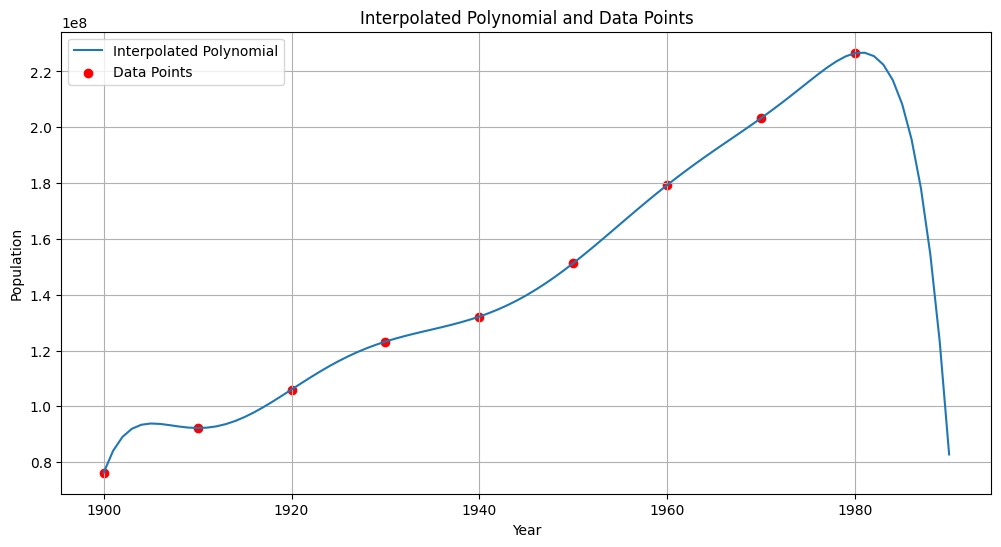

In [4]:
best_base_type = np.argmin(cond_numbers) + 1  # Wychodzi 4, dlatego bierzemy bazę funkcji postaci φj(t) = ((t - 1940)/40)^(j-1)
V_best = create_vandermonde_matrix(years, best_base_type)
coefficients = np.linalg.solve(V_best, population)

def horner(x, coeffs):
    n = len(coeffs) - 1
    result = coeffs[-1]
    for i in range(n-1, -1, -1):
        result = result * x + coeffs[i]
    return result

x_values = np.arange(1900, 1991)
y_values = horner((x_values - 1940)/40, coefficients)

plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, label='Interpolated Polynomial')
plt.scatter(years, population, color='red', label='Data Points')
plt.title('Interpolated Polynomial and Data Points')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

d)

In [5]:
true_value_1990 = 248709873
#predicted_1990 = poly((1990 - 1940) / 40)
predicted_1990 = horner((1990 - 1940)/40, coefficients)
relative_error = np.abs(predicted_1990 - true_value_1990) / true_value_1990

print("Obtained value for the year 1990:", predicted_1990)
print("Actural value for the year 1990:", true_value_1990)
print("Absolute extrapolation error for the year 1990:", np.abs(predicted_1990 - true_value_1990))
print("Relative extrapolation error for the year 1990:", relative_error)

Obtained value for the year 1990: 82749141.00000246
Actural value for the year 1990: 248709873
Absolute extrapolation error for the year 1990: 165960731.99999756
Relative extrapolation error for the year 1990: 0.6672864651416454


e)

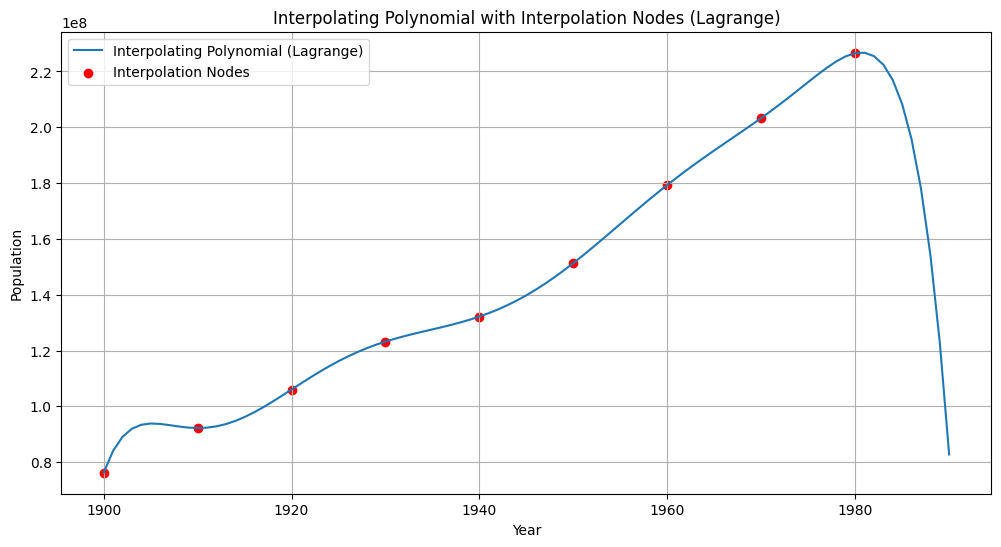

In [6]:
def lagrange(x, y, x_values):
    n = len(x)
    y_values = np.zeros_like(x_values, dtype=np.float64)
    
    for i in range(n):
        poly = np.ones_like(x_values, dtype=np.float64)
        for j in range(n):
            if j != i:
                poly *= (x_values - x[j]) / (x[i] - x[j])
        y_values += y[i] * poly
        
    return y_values

x_values = np.arange(1900, 1991)
y_values = lagrange(years, population, x_values)

plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, label='Interpolating Polynomial (Lagrange)')
plt.scatter(years, population, color='red', label='Interpolation Nodes')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Interpolating Polynomial with Interpolation Nodes (Lagrange)')
plt.legend()
plt.grid(True)
plt.show()

f)

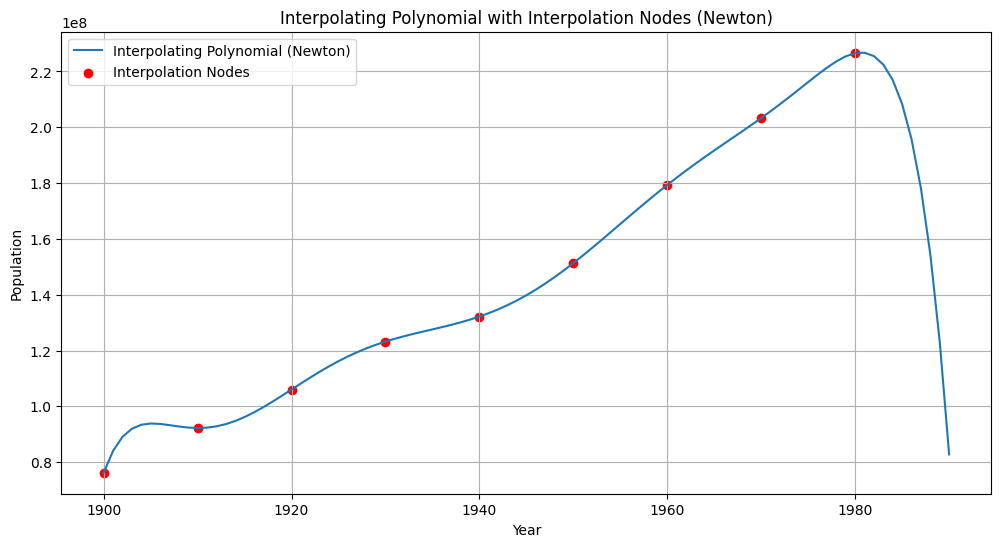

In [7]:
def newton_interpolation_coefficients(x, y):
    n = len(x)
    coefficients = np.zeros(n)
    divided_differences = np.zeros((n, n))
    divided_differences[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            divided_differences[i, j] = (divided_differences[i + 1, j - 1] - divided_differences[i, j - 1]) / (x[i + j] - x[i])
    
    coefficients[0] = divided_differences[0, 0]
    for i in range(1, n):
        coefficients[i] = divided_differences[0, i]

    return coefficients

def newton_interpolation_polynomial(x, coefficients, x_interp):
    n = len(coefficients)
    y_interp = np.zeros_like(x_interp, dtype=np.float64)

    for i in range(n):
        term = coefficients[i]
        for j in range(i):
            term *= (x_interp - x[j])
        y_interp = np.add(y_interp, term)  # Poprawna operacja dodawania
    return y_interp

coefficients_newton = newton_interpolation_coefficients(years, population)

x_interp = np.arange(1900, 1991)

y_interp_newton = newton_interpolation_polynomial(years, coefficients_newton, x_interp)

plt.figure(figsize=(12, 6))
plt.plot(x_interp, y_interp_newton, label='Interpolating Polynomial (Newton)')
plt.scatter(years, population, color='red', label='Interpolation Nodes')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Interpolating Polynomial with Interpolation Nodes (Newton)')
plt.legend()
plt.grid(True)
plt.show()

g)

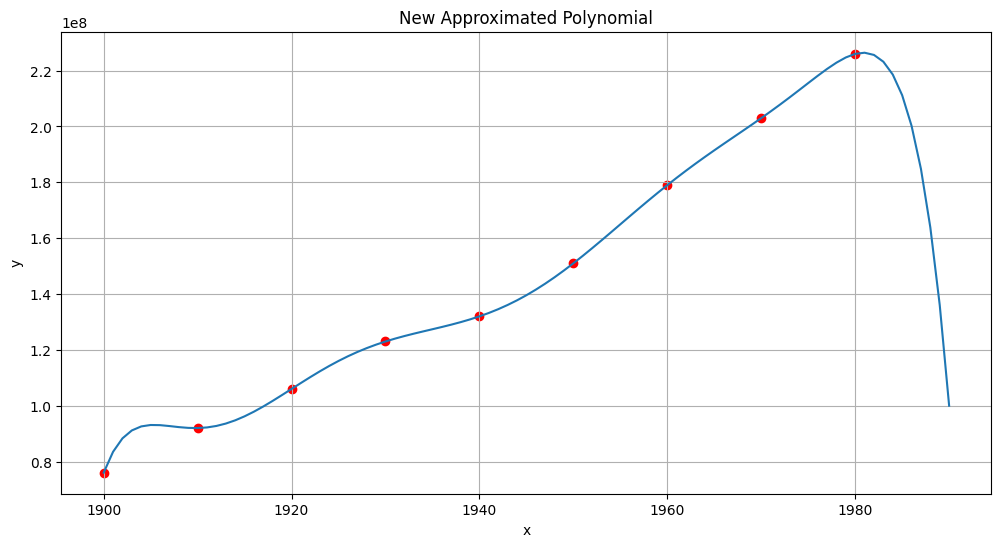

In [16]:
new_population = population - population%10**6
V_best = create_vandermonde_matrix(years, 4)
coefficients_new = np.linalg.solve(V_best, new_population)
x_interp = np.arange(1900, 1991)
y_interp = horner((x_interp - 1940)/40, coefficients_new)

plt.figure(figsize=(12, 6))
plt.plot(x_interp, y_interp)
plt.scatter(years, new_population, color='red', label='Interpolation Nodes')
plt.title("New Approximated Polynomial")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [19]:
predicted_1990 = horner((1990 - 1940)/40, coefficients_new)
true_value_1990 = 248709873
relative_error = np.abs(predicted_1990 - true_value_1990) / true_value_1990

print("Obtained value for the year 1990:", predicted_1990)
print("Actural value for the year 1990:", true_value_1990)
print("Absolute extrapolation error for the year 1990:", np.abs(predicted_1990 - true_value_1990))
print("Relative extrapolation error for the year 1990:", relative_error)

Obtained value for the year 1990: 100000000.00000298
Actural value for the year 1990: 248709873
Absolute extrapolation error for the year 1990: 148709872.99999702
Relative extrapolation error for the year 1990: 0.5979250892062375


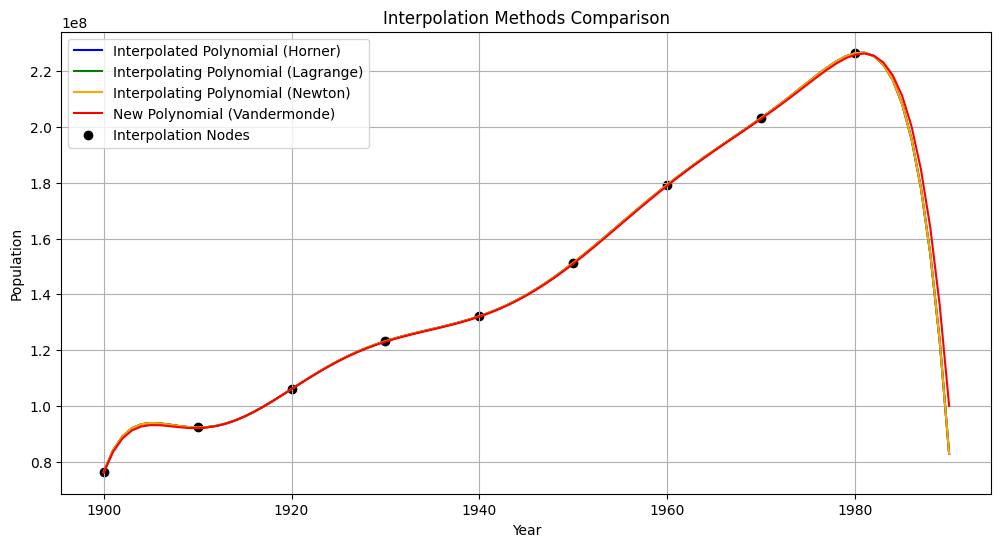

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, label='Interpolated Polynomial (Horner)', color='blue')
plt.plot(x_values, lagrange(years, population, x_values), label='Interpolating Polynomial (Lagrange)', color='green')
plt.plot(x_interp, y_interp_newton, label='Interpolating Polynomial (Newton)', color='orange')
plt.plot(x_interp, y_interp, label='New Polynomial (Vandermonde)', color='red')

plt.scatter(years, population, color='black', label='Interpolation Nodes')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Interpolation Methods Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
print("Coefficients:", coefficients)
print("New Coefficients:", coefficients_new)
print("Relative error:", (coefficients - coefficients_new)/coefficients)

Coefficients: [ 1.32164569e+08  4.61307656e+07  1.02716315e+08  1.82527130e+08
 -3.74614715e+08 -3.42668456e+08  6.06291250e+08  1.89175576e+08
 -3.15180235e+08]
New Coefficients: [ 1.32000000e+08  4.59714286e+07  1.00155556e+08  1.80800000e+08
 -3.57066667e+08 -3.37066667e+08  5.71733333e+08  1.85295238e+08
 -2.95822222e+08]
Relative error: [0.00124518 0.00345403 0.0249304  0.00946232 0.04684292 0.01634755
 0.05699887 0.02051183 0.06141887]


Na wspólnym wykresie widać, że błędy te przy takiej skali są niezauważalne. Błąd względny przy zaokrąglaniu populacji jest na poziomie częsci dziesiętnych procenta. Na podstawie nowo policzonych współczynników wielomianu możemy również zauważyć, że błąd względny tych współczynników jest już większy (na poziomie kilku procent) jednak wciąż tylko nieznacznie wpływa on na kształt wykresu.